In [1]:
# Let's start simple with a LocalCluster that makes use of all the cores and RAM we have on a single machine
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
# explicitly connect to the cluster we just created
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:40674 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 67.15 GB


In [2]:
import intake
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
#import cmocean.cm as cmo
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)
cat = col.search(
    table_id='Omon',
    grid_label='gn',
    experiment_id='historical',
    member_id='r1i1p1f1',
    variable_id=['cfc11', 'so', 'thetao'],
    source_id=['CESM2']
)

In [3]:
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,3
grid_label,1
zstore,3
dcpp_init_year,0


In [4]:
#!pip install git+https://github.com/jbusecke/cmip6_preprocessing.git
#!pip install git+https://github.com/xgcm/fastjmd95
## These are only needed for the animation at the end
#!conda install ffmpeg -y
#!pip install xmovie

In [5]:
from cmip6_preprocessing.preprocessing import combined_preprocessing
ddict = cat.to_dataset_dict(
    zarr_kwargs={'consolidated':True, 'decode_times':True},
    preprocess=combined_preprocessing
)
ds = ddict['CMIP.NCAR.CESM2.historical.Omon.gn']
ds


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


<xarray.Dataset>
Dimensions:        (bnds: 2, lev: 60, member_id: 1, time: 1980, vertex: 4, x: 320, y: 384)
Coordinates: (12/15)
    lat            (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lat_verticies  (y, x, vertex) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
  * lev            (lev) float64 5.0 15.0 25.0 ... 4.875e+03 5.125e+03 5.375e+03
    lev_bounds     (lev, bnds) float32 dask.array<chunksize=(60, 2), meta=np.ndarray>
    lon            (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon_verticies  (y, x, vertex) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
    ...             ...
    time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * bnds           (bnds) int64 0 1
  * vertex         (vertex) int64 0 1 2 3
    lon_bounds     (bnds, y, x) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    lat_bounds     (bnds, y, x) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
  * member_id      (member_id) <U8 'r1i1p1f1'
Data variables:
    cfc11          (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 15, 60, 384, 320), meta=np.ndarray>
    so             (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 10, 60, 384, 320), meta=np.ndarray>
    thetao         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 8, 60, 384, 320), meta=np.ndarray>
Attributes: (12/50)
    source_type:             AOGCM BGC
    nominal_resolution:      100 km
    parent_time_units:       days since 0001-01-01 00:00:00
    realm:                   ocean
    parent_variant_label:    r1i1p1f1
    variant_info:            CMIP6 20th century experiments (1850-2014) with ...
    ...                      ...
    branch_time_in_child:    674885.0
    grid:                    native gx1v7 displaced pole grid (384x320 latxlon)
    data_specs_version:      01.00.29
    table_id:                Omon
    frequency:               mon
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.Omon.gn

In [6]:
ds.cfc11

<xarray.DataArray 'cfc11' (member_id: 1, time: 1980, lev: 60, y: 384, x: 320)>
dask.array<broadcast_to, shape=(1, 1980, 60, 384, 320), dtype=float32, chunksize=(1, 15, 60, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lev        (lev) float64 5.0 15.0 25.0 ... 4.875e+03 5.125e+03 5.375e+03
    lon        (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * y          (y) float64 -79.22 -78.69 -78.15 -77.62 ... 89.11 89.66 89.71
  * x          (x) float64 1.062 2.187 3.312 4.437 ... 356.6 357.7 358.8 359.9
  * time       (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Mole concentration means number of moles per unit volume,...
    description:    Mole concentration means number of moles per unit volume,...
    frequency:      mon
    id:             cfc11
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Mole Concentration of CFC11 in Sea Water
    type:           real
    units:          mol m-3
    variable_id:    cfc11

In [7]:
cfc11=ds.cfc11.sel(lev=5.0,member_id='r1i1p1f1')
cfc11

<xarray.DataArray 'cfc11' (time: 1980, y: 384, x: 320)>
dask.array<getitem, shape=(1980, 384, 320), dtype=float32, chunksize=(15, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lev        float64 5.0
    lon        (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * y          (y) float64 -79.22 -78.69 -78.15 -77.62 ... 89.11 89.66 89.71
  * x          (x) float64 1.062 2.187 3.312 4.437 ... 356.6 357.7 358.8 359.9
  * time       (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:00:00
    member_id  <U8 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Mole concentration means number of moles per unit volume,...
    description:    Mole concentration means number of moles per unit volume,...
    frequency:      mon
    id:             cfc11
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Mole Concentration of CFC11 in Sea Water
    type:           real
    units:          mol m-3
    variable_id:    cfc11

In [8]:
cfc11.loc["1960-01-01":"1980-01-01"]

<xarray.DataArray 'cfc11' (time: 240, y: 384, x: 320)>
dask.array<getitem, shape=(240, 384, 320), dtype=float32, chunksize=(15, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lev        float64 5.0
    lon        (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * y          (y) float64 -79.22 -78.69 -78.15 -77.62 ... 89.11 89.66 89.71
  * x          (x) float64 1.062 2.187 3.312 4.437 ... 356.6 357.7 358.8 359.9
  * time       (time) object 1960-01-15 12:00:00 ... 1979-12-15 12:00:00
    member_id  <U8 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Mole concentration means number of moles per unit volume,...
    description:    Mole concentration means number of moles per unit volume,...
    frequency:      mon
    id:             cfc11
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Mole Concentration of CFC11 in Sea Water
    type:           real
    units:          mol m-3
    variable_id:    cfc11

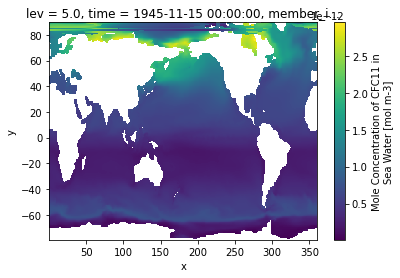

In [9]:
cfc11[1150].plot()

In [10]:
cfc11_1940_1980 = cfc11.loc["1940-01-01":"1980-01-01"].resample(time='A').mean(dim='time')

In [11]:
cfc11_1940_1980

<xarray.DataArray 'cfc11' (time: 40, y: 384, x: 320)>
dask.array<stack, shape=(40, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1940-12-31 00:00:00 ... 1979-12-31 00:00:00
    lat        (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lev        float64 5.0
    lon        (y, x) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * y          (y) float64 -79.22 -78.69 -78.15 -77.62 ... 89.11 89.66 89.71
  * x          (x) float64 1.062 2.187 3.312 4.437 ... 356.6 357.7 358.8 359.9
    member_id  <U8 'r1i1p1f1'

In [12]:
#import xarray as xr
#from xmovie import Movie
#mov1=Movie(cfc11_1940_1980,vmin=0.)
#mov1.save('cfc11.gif',overwrite_existing=True)
#mov1.preview(10)

/home/Niki.Zadeh/opt/miniconda/envs/om4labs/lib/python3.8/site-packages/xmovie/core.py:53: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  warnings.warn(


RuntimeError: File `cfc11.gif` already exists. Set `overwrite_existing` to True to overwrite.

In [ ]:
#from xmovie.presets import rotating_globe
# specify custom plotfunctions (here a preset from xmovie)
#mov2 = Movie(cfc11_1940_1980, plotfunc=rotating_globe,vmin=0.)
#mov2.save('movie_rotating.gif', progress=True)

In [ ]:
#did not work on gpu box
#ValueError: No dask-gateway address provided or found in configuration

#from dask.distributed import Client, progress
#from dask_gateway import Gateway
#gateway = Gateway()
#cluster = gateway.new_cluster()
#cluster.adapt(minimum=2, maximum=12)
#cluster

In [ ]:
from fastjmd95 import rho
ds['sigma_0'] = rho(ds.so, ds.thetao, 0) - 1000

In [ ]:
ds.sigma_0

In [ ]:
ds_section = ds.sel(
  time='2010-01',
  y=slice(-90,10),
  lev=slice(0,1500)
).interp(x=230).squeeze()

In [ ]:
ds_section

In [ ]:
import cmocean.cm as cmo
fig, axarr = plt.subplots(nrows=3, figsize=[10,12], sharex=True)
for ax, var, cmap in zip(
    axarr.flat,
    ['thetao', 'so', 'cfc11'],
    [cmo.thermal, cmo.haline, cmo.matter]
):
    kwargs = dict(yincrease=False, x='lat', y='lev', ax=ax)
    
    # Plot a section along the dateline in 1980 in the southern ocean
    ds_section[var].plot.contourf(
       levels=31, robust=True, cmap=cmap, **kwargs
    )
    # contour the density levels
    ds_section.sigma_0.plot.contour(
        levels=np.arange(24.2,29, 0.4), colors='w', **kwargs
    )
    ax.set_title('')
# add a bit more space between the panels
fig.subplots_adjust(hspace=0.2)

In [ ]:
# Construct an outer grid coordinate from lev bounds
lev_outer = np.hstack(
  [ds.lev_bounds.isel(bnds=0).load().data,
   ds.lev_bounds.isel(bnds=1, lev=-1).load().data]
)
ds = ds.assign_coords(lev_outer=lev_outer)

In [ ]:
ds.lev_bounds

In [ ]:
# create the grid object
from xgcm import Grid
grid = Grid(
  ds,
  periodic=False,
  coords={'Z':{'center':'lev', 'outer':'lev_outer'}})
grid

In [ ]:
target_values = levels=np.arange(24.2,28, 0.2)

In [ ]:
so_sigma = grid.transform(
  ds.so,
  'Z',
  target_values,
  target_data=ds.sigma_0
)
so_sigma

In [ ]:
# Lets do the same thing with cfcs and package them into a dataset
cfc_sigma = grid.transform(
  ds.cfc11,
  'Z',
  target_values,
  target_data=ds.sigma_0)
ds_sigma = xr.Dataset({'cfc11':cfc_sigma, 'so':so_sigma})
ds_sigma

In [ ]:
ds_sigma_section = ds_sigma.sel(
  time='2010-01',
  y=slice(-90,10)
).interp(x=230).squeeze()

fig, axarr = plt.subplots(nrows=2, figsize=[10,8], sharex=True)
for ax, var, cmap in zip(
  axarr.flat,
  ['so', 'cfc11'],
  [cmo.haline, cmo.matter]
):
    
    kwargs = dict(yincrease=False, x='lat', y='sigma_0', ax=ax)
    
    ds_sigma_section[var].plot.contourf(
        levels=31, robust=True, cmap=cmap, **kwargs
    )
    ax.axhline(26.4, color='C1')
    ax.set_title('')
# add a bit more space between the panels
fig.subplots_adjust(hspace=0.2)

In [ ]:
ds_sigma_map = ds_sigma.sel(
  time='2000-01',
  sigma_0=26.6,
  method='nearest'
).sel(y=slice(-90,0)).squeeze()

import cartopy.crs as ccrs
import matplotlib.path as mpath
import cartopy.feature as cfeature

fig, axarr = plt.subplots(nrows=2,
                          figsize=[16,8],
                          subplot_kw={'projection':ccrs.PlateCarree(200)}
                         )
for ax, var, cmap in zip(
  axarr.flat,
  ['so', 'cfc11'],
  [cmo.haline, cmo.matter]
):
    
    if var == 'cfc11':
        vmin = 0
        vmax = 6e-9
    else:
        vmin = None
        vmax = None
    
    kwargs = dict(x='lon', y='lat', ax=ax, transform=ccrs.PlateCarree())
    
    ds_sigma_map[var].plot.contourf(
        levels=31, robust=True, cmap=cmap, vmin=vmin, vmax=vmax,  **kwargs
    )
ax.set_title('')
ax.add_feature(cfeature.LAND, edgecolor='0.3')

In [ ]:
cfc11_1940_1980

In [ ]:
import hvplot.xarray
cfc11_1940_1980.hvplot.image('x', 'y',
                    rasterize=True, dynamic=True, width=800, height=450,
                    widget_type='scrubber', widget_location='bottom', cmap='RdBu_r')